**Aim**: Demonstrate the working of the Random forest algorithm. Use an appropriate dataset for building and apply this knowledge to classify a new sample.

---

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
dataset = pd.read_csv('mushrooms.csv')
print(dataset.head())
print(dataset.head().describe())

  class cap-shape cap-surface cap-color bruises odor gill-attachment   
0     p         x           s         n       t    p               f  \
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring   
0            c         n          k  ...                        s  \
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color   
0                      w                      w         p          w  \
1       

In [7]:
dataset.shape
dataset.isnull().sum()
from sklearn.preprocessing import LabelEncoder
dataset: pd.DataFrame = dataset.apply(LabelEncoder().fit_transform)
print(dataset.head())
## Feature Scaling - dataframe.iloc[:,start_col:end_col]
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment   
0      1          5            2          4        1     6                1  \
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring   
0             0          1           4  ...                         2  \
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color   
0         

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)
print('\nNo of observations in training data:',len(X_train))
print('\nNo of observations in test data:',len(X_test))


No of observations in training data: 6093

No of observations in test data: 2031



Confusion Matrix:  [[1078  105]
 [  66  782]]

Classfication Report:
                precision    recall  f1-score   support

           0       0.94      0.91      0.93      1183
           1       0.88      0.92      0.90       848

    accuracy                           0.92      2031
   macro avg       0.91      0.92      0.91      2031
weighted avg       0.92      0.92      0.92      2031


Accuracy_Score:  0.9158050221565731

Total MSE 0.08419497784342689
Standard deviation of the Residuals: 0.29016370869463826

Log Loss:  3.034694598492877


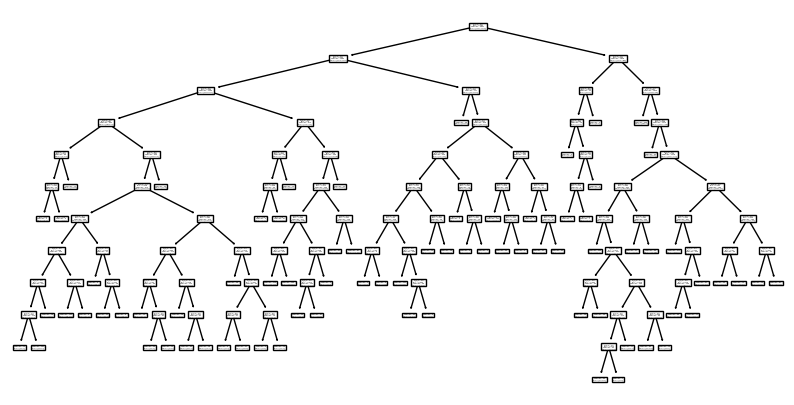

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.estimators_
plt.figure(figsize=(10,5))
tree.plot_tree(classifier.estimators_[0])
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import log_loss
print('\nConfusion Matrix: ',confusion_matrix(y_test,y_pred))
#classification_report: performance evaluation metric in machine learning which is used to show the precision, recall, F1 Score, and supp
print('\nClassfication Report:\n ',classification_report(y_test,y_pred))
print('\nAccuracy_Score: ',accuracy_score(y_test, y_pred))
print('\nTotal MSE',mean_squared_error(y_test,y_pred))
print('Standard deviation of the Residuals:',np.sqrt(mean_squared_error(y_test, y_pred)))
#A loss function represents how much the predicted probabilities deviate from the true ones.
print('\nLog Loss: ',log_loss(y_test, y_pred))